In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/-spotify-tracks-dataset/dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## EDA 


In [5]:
df.shape

(114000, 21)

In [6]:
df = df.drop("Unnamed: 0", axis=1) ##remove the unnamed column
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [10]:
df.describe(exclude=np.number)

,track_id,artists,album_name,track_name,explicit,track_genre
count,114000,113999,113999,113999,114000,114000
unique,89741,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104253,1000


In [11]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
df.dropna()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [13]:
df.duplicated().sum()

450

In [14]:
df.nunique()

track_id            89741
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [15]:
df['duration_ms'] = df['duration_ms']/1000

In [16]:
df.rename(columns={'duration_ms': 'duration_s'})

,track_id,artists,album_name,track_name,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384.999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385.000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271.466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283.893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Display loudness and popularity

In [17]:
df[['loudness', 'popularity',]]

,loudness,popularity
0,-6.746,73
1,-17.235,55
2,-9.734,57
3,-18.515,71
4,-9.681,82
...,...,...
113995,-16.393,21
113996,-18.318,22
113997,-10.895,22
113998,-10.889,41


### differnt artists have similar track name

In [18]:
df[df['track_name']=='Hey Jude']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11052,1eT2CjXwFXNx6oY5ydvzKU,The Beatles,Love,Hey Jude,66,238.854,False,0.462,0.632,5,-7.438,1,0.0248,0.091,0.000000,0.397,0.585,74.268,4,british
26932,1GQc37FbWylRis3ScDOOcy,Billboard Baby Lullabies,Lullaby Renditions of The Beatles,Hey Jude,18,440.596,False,0.531,0.293,10,-15.360,1,0.0430,0.994,0.870000,0.129,0.101,76.005,4,disney
84101,1eT2CjXwFXNx6oY5ydvzKU,The Beatles,Love,Hey Jude,66,238.854,False,0.462,0.632,5,-7.438,1,0.0248,0.091,0.000000,0.397,0.585,74.268,4,psych-rock
90665,3tNyFKxcFszV0TiDDJsYVx,Elvis Presley,Elvis Now,Hey Jude,56,271.573,False,0.333,0.338,3,-15.480,1,0.0278,0.783,0.000116,0.110,0.627,78.662,4,rock-n-roll
92385,3tNyFKxcFszV0TiDDJsYVx,Elvis Presley,Elvis Now,Hey Jude,56,271.573,False,0.333,0.338,3,-15.480,1,0.0278,0.783,0.000116,0.110,0.627,78.662,4,rockabilly


<Axes: xlabel='track_genre', ylabel='Count'>

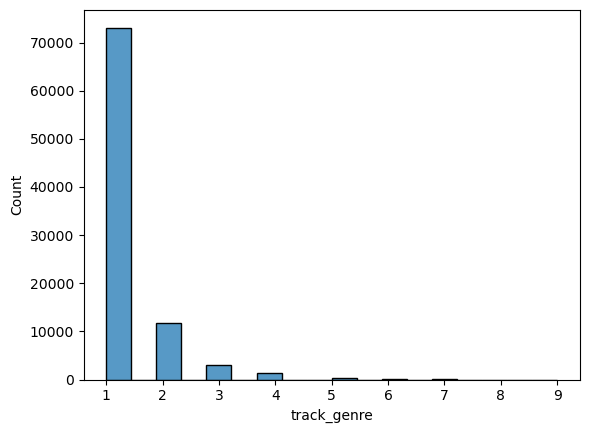

In [19]:
sns.histplot(df.groupby(['track_id'])['track_genre'].count().sort_values())

### Different tracks are duplicated due to their genre

In [20]:
# removing duplicates
key_columns = ['artists', 'album_name', 'track_name'] 
df = df.drop_duplicates(subset=key_columns)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384.999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385.000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271.466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283.893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Categorical Feature

In [21]:
feature_categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
df[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [22]:
for feature in feature_categorical:
    dataset=df.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89380
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 113


There are a lot of unique entries in each of the categorical features.

Most of the categorical features are names like track name, album name, artist name, etc. track_id is unique for every song/track.

### Numerical Feature

In [23]:
feature_numerical=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
df[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [24]:
feature_discrete_numerical=[feature for feature in feature_numerical if df[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

In [25]:
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

### Checking for outlier

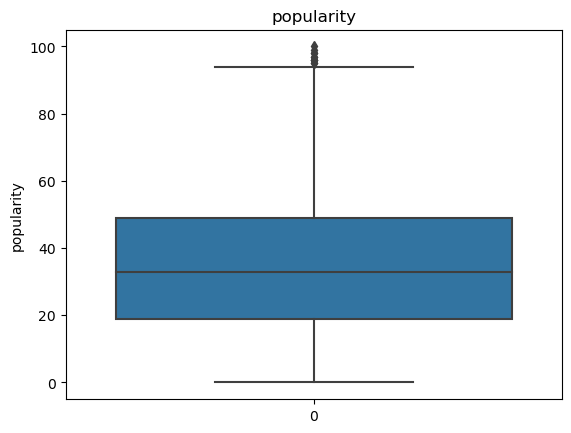

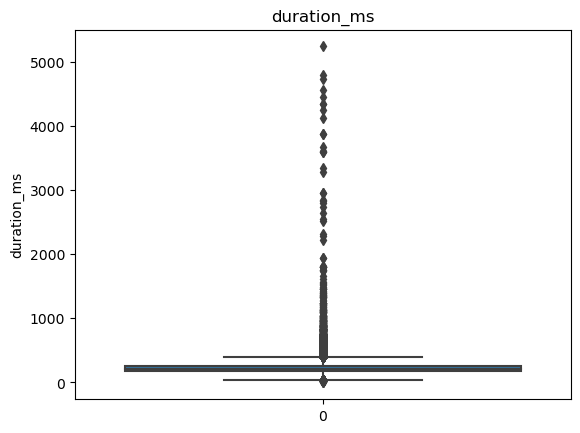

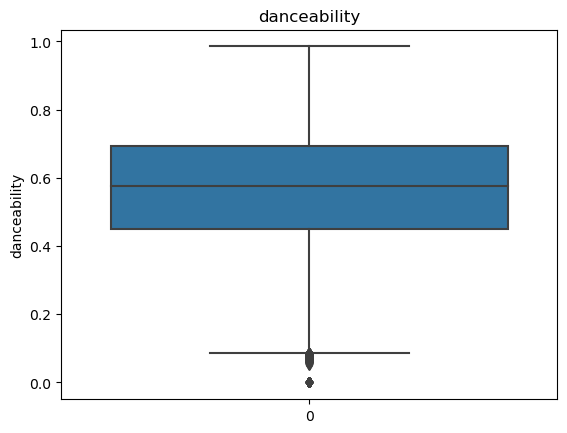

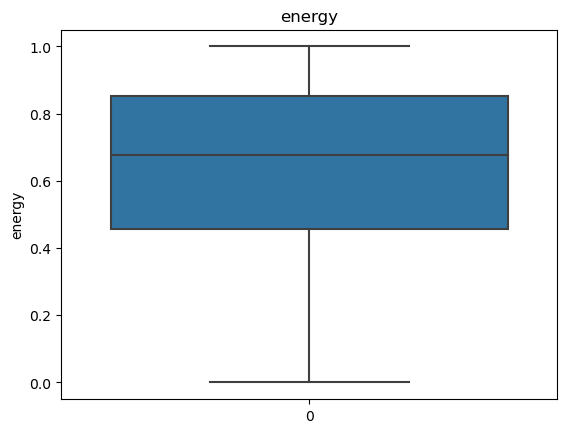

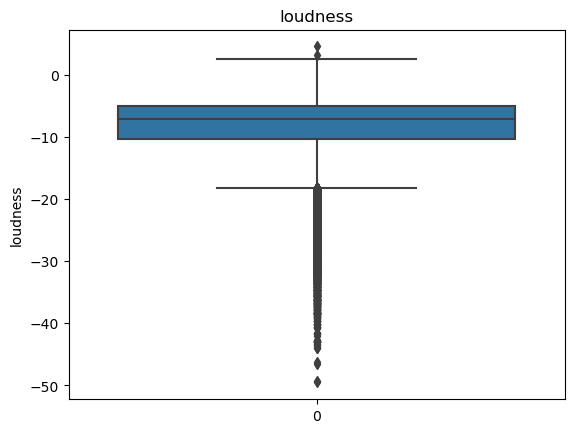

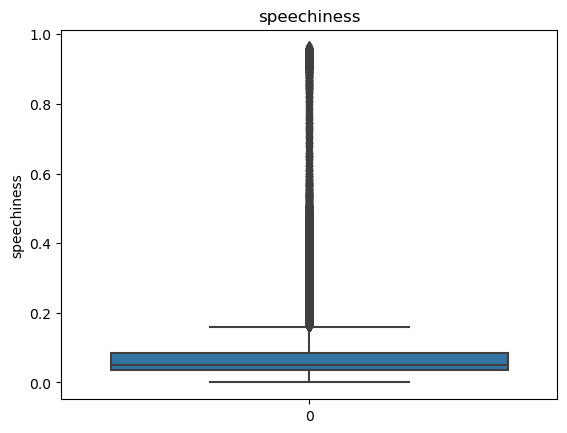

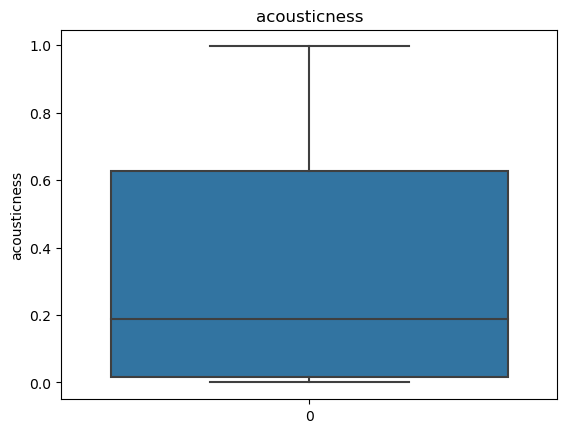

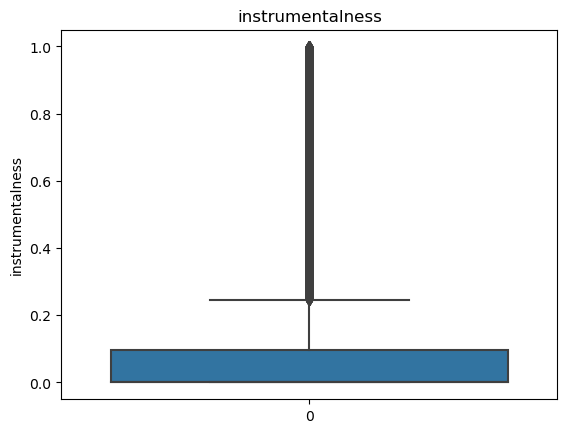

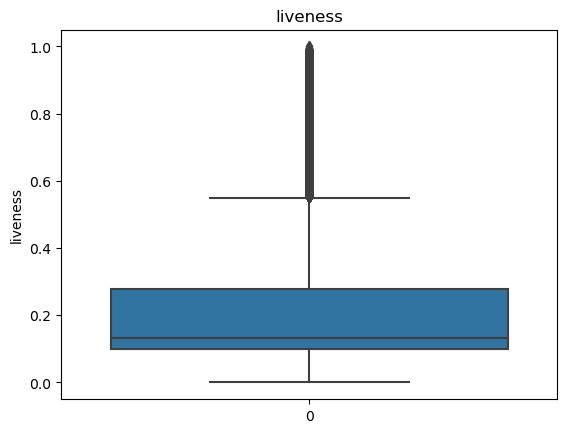

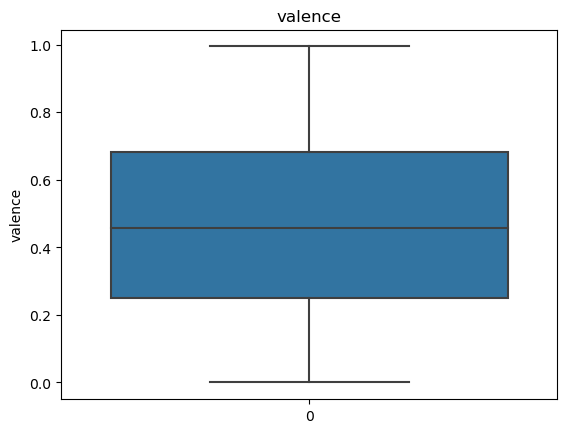

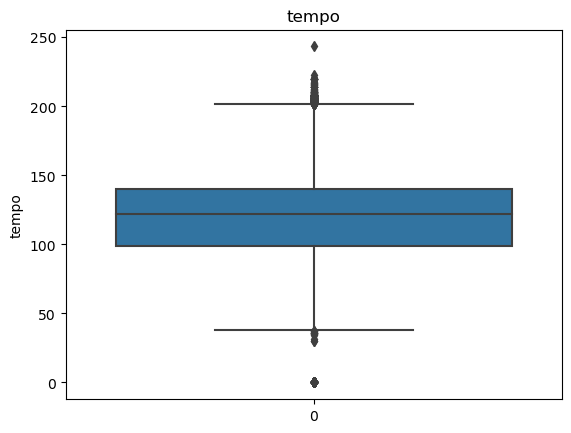

In [26]:
for feature in features_continuous_numerical:
    dataset=df.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We see that apart from energy, acousticness and valence, there are a lot of outliers in most of the features.

### Plotting

<Axes: xlabel='key', ylabel='count'>

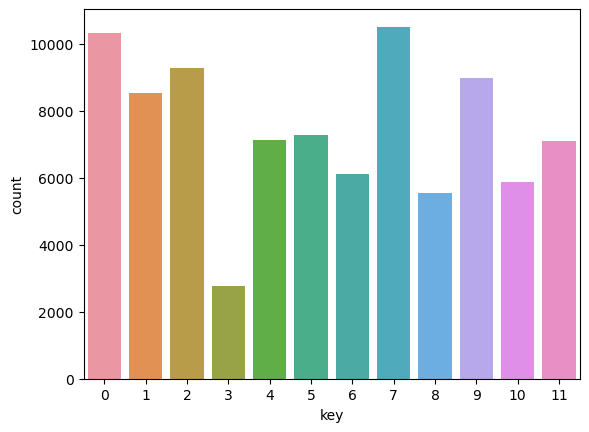

In [27]:
sns.countplot(data=df.drop_duplicates('track_id'), x='key')

<Axes: xlabel='time_signature', ylabel='count'>

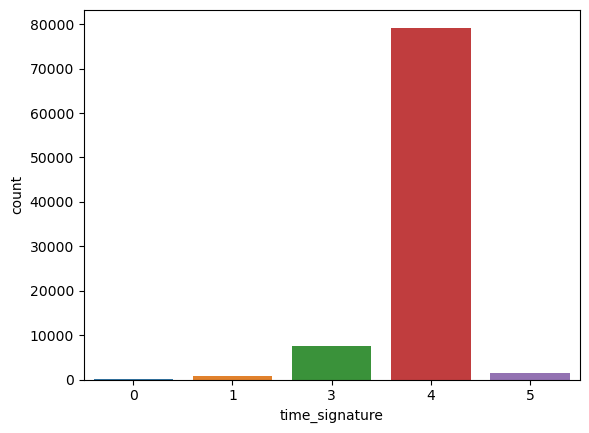

In [28]:
sns.countplot(data=df.drop_duplicates('track_id'), x='time_signature')

### Top 5 danceable songs

In [29]:
danceable = df[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


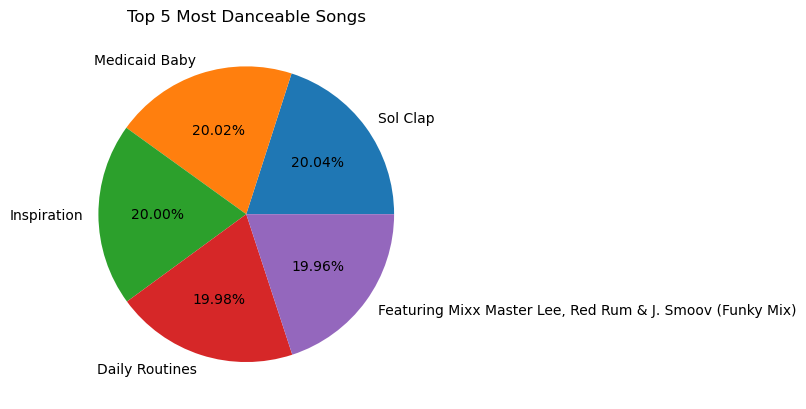

In [30]:
plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

## Dealing with artists
#### Top 10 artists by number of songs

Text(0.5, 0, 'Number of songs')

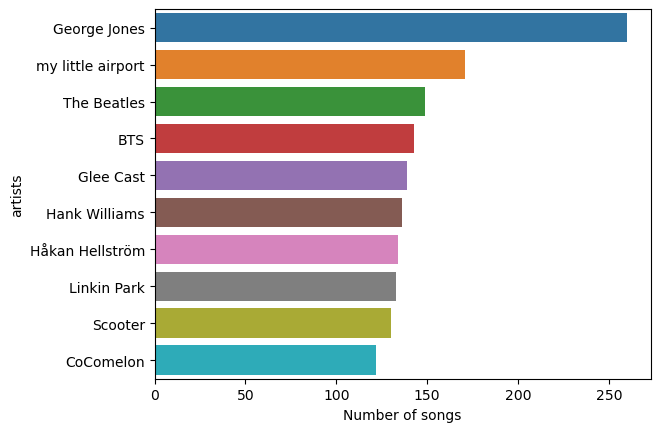

In [31]:
temp = df.groupby('artists').count().sort_values('key',ascending=False).head(10).reset_index()[['artists', 'tempo']]
sb = sns.barplot(data=temp, y='artists', x='tempo')
sb.set_xlabel('Number of songs')

## Heat Map

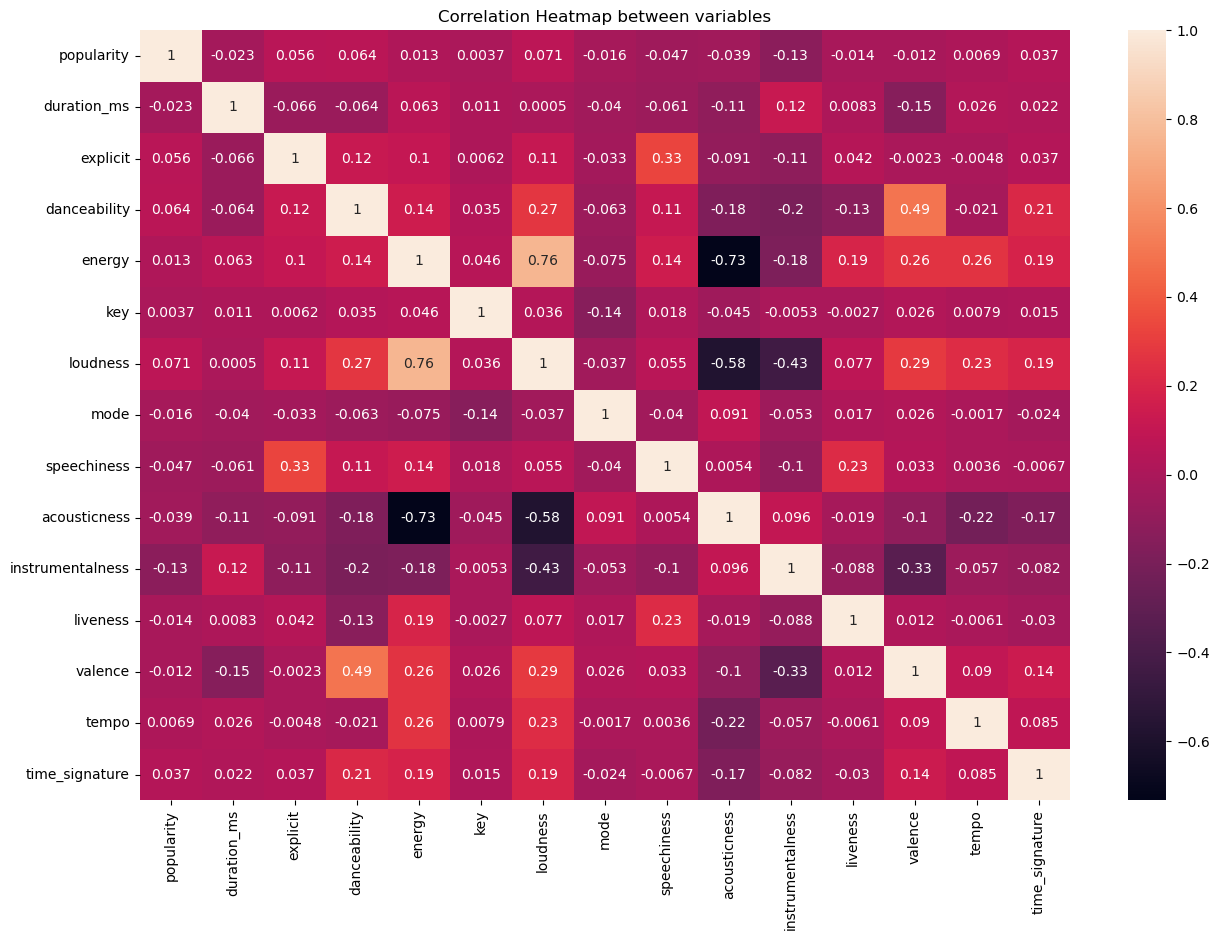

In [32]:
dataset=df.copy()
plt.figure(figsize=(15,10))
sns.heatmap(df[feature_numerical].corr(), annot=True)
plt.title("Correlation Heatmap between variables")
plt.show()

# Attempting to asses the least/most popular genre. Types of metrics used:

* Sum of popularity

* Number in upper quartile


## By sum of popularity

#### By number in top 10%, 25%, 50%

In [33]:
pop_df = df[['popularity', 'track_genre']]
pop_df

,popularity,track_genre
0,73,acoustic
1,55,acoustic
2,57,acoustic
3,71,acoustic
4,82,acoustic
...,...,...
113995,21,world-music
113996,22,world-music
113997,22,world-music
113998,41,world-music


In [34]:
thres50 = 35
thres25 = 50
thres10 = 63


pop50 = pop_df.loc[pop_df['popularity']>=thres50]
pop25 = pop_df.loc[pop_df['popularity']>=thres25]
pop10 = pop_df.loc[pop_df['popularity']>=thres10]

print(f'pop50: {pop50.shape}, pop25: {pop25.shape}, pop10: {pop10.shape}')
print(f'pop50: {pop50.track_genre.describe()},pop25: {pop25.track_genre.describe()},pop10: {pop10.track_genre.describe()}')

pop50: (43158, 2), pop25: (21100, 2), pop10: (7156, 2)
pop50: count     43158
unique      112
top       forro
freq        996
Name: track_genre, dtype: object,pop25: count        21100
unique         107
top       pop-film
freq           769
Name: track_genre, dtype: object,pop10: count      7156
unique       98
top       k-pop
freq        417
Name: track_genre, dtype: object


In [35]:
df['track_genre'].describe()

count        89380
unique         113
top       cantopop
freq           999
Name: track_genre, dtype: object

(0.0, 1.0, 0.0, 1.0)

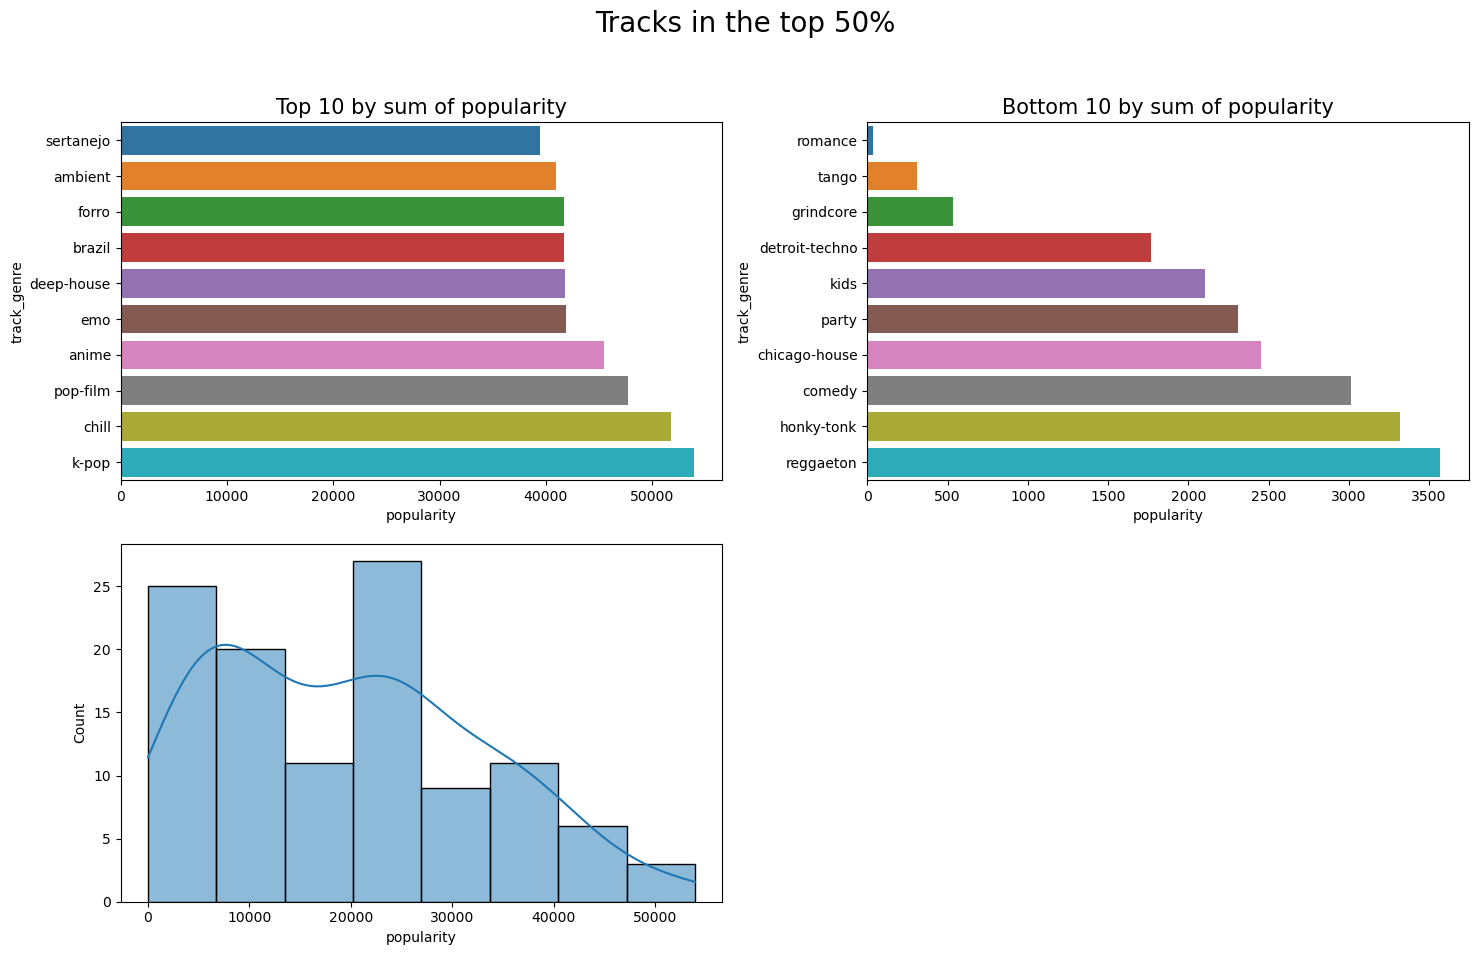

In [36]:
pop_df = pop50[['popularity', 'track_genre']]
pop_sum = pop_df.groupby('track_genre').sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()
sns.histplot(data=pop_sum, x='popularity', kde=True, ax=axes[2])

top10 = pop_sum.sort_values('popularity').tail(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[0])
sb.set_title('Top 10 by sum of popularity', fontsize=15)

top10 = pop_sum.sort_values('popularity').head(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[1])
sb.set_title('Bottom 10 by sum of popularity', fontsize=15)

fig.suptitle('Tracks in the top 50%', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes[-1].axis('off')


(0.0, 1.0, 0.0, 1.0)

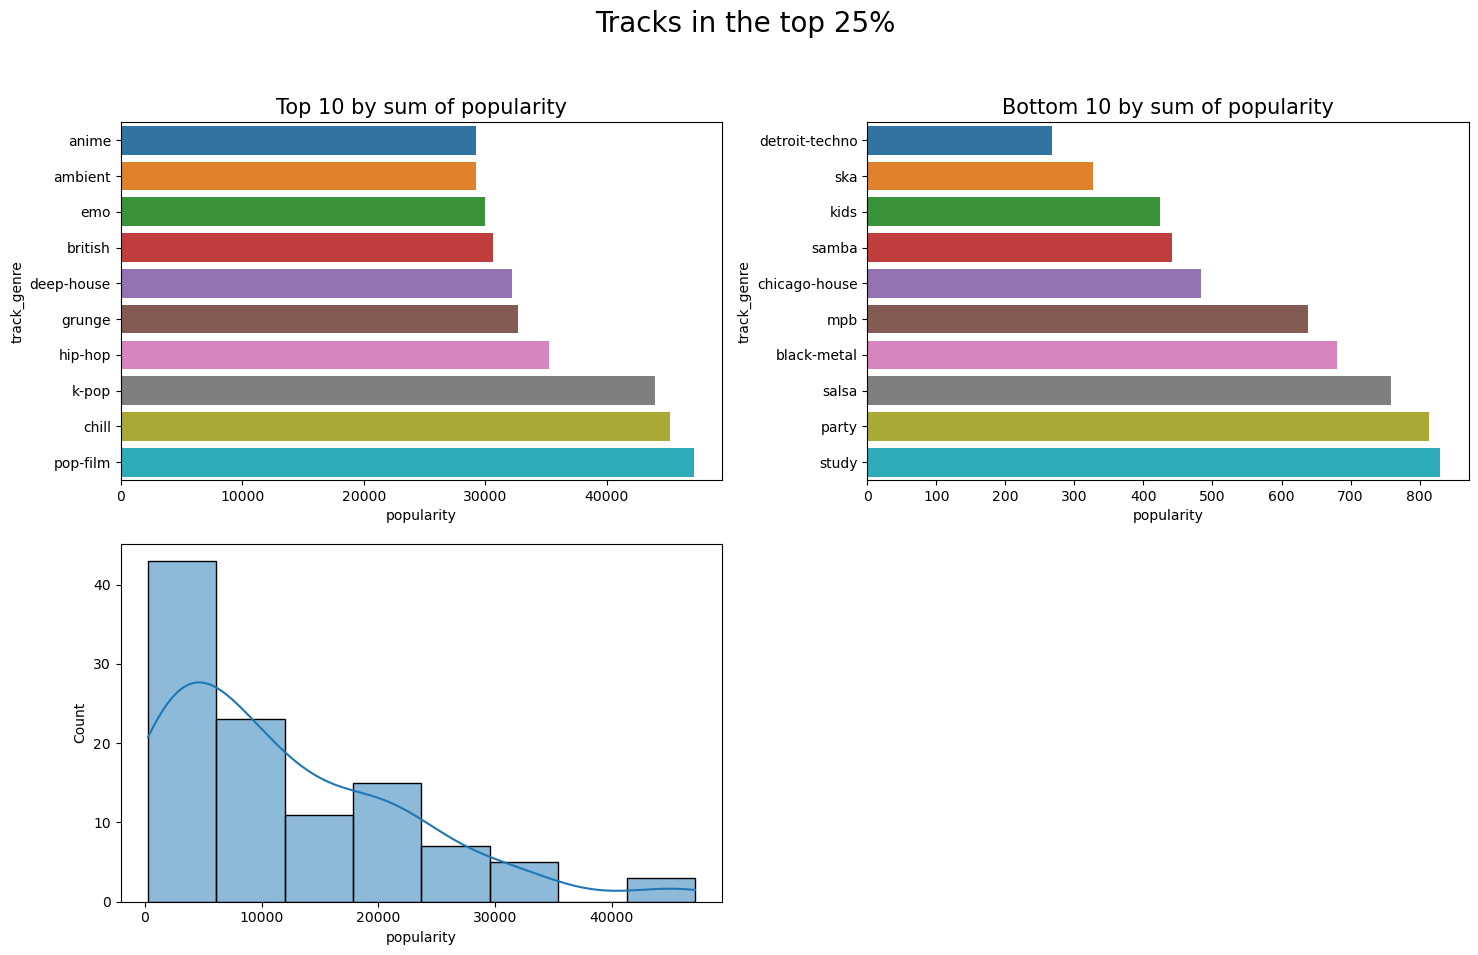

In [37]:
pop_df = pop25[['popularity', 'track_genre']]
pop_sum = pop_df.groupby('track_genre').sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
sns.histplot(data=pop_sum, x='popularity', kde=True, ax=axes[2])

top10 = pop_sum.sort_values('popularity').tail(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[0])
sb.set_title('Top 10 by sum of popularity', fontsize=15)

top10 = pop_sum.sort_values('popularity').head(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[1])
sb.set_title('Bottom 10 by sum of popularity', fontsize=15)

fig.suptitle('Tracks in the top 25%', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes[-1].axis('off')

(0.0, 1.0, 0.0, 1.0)

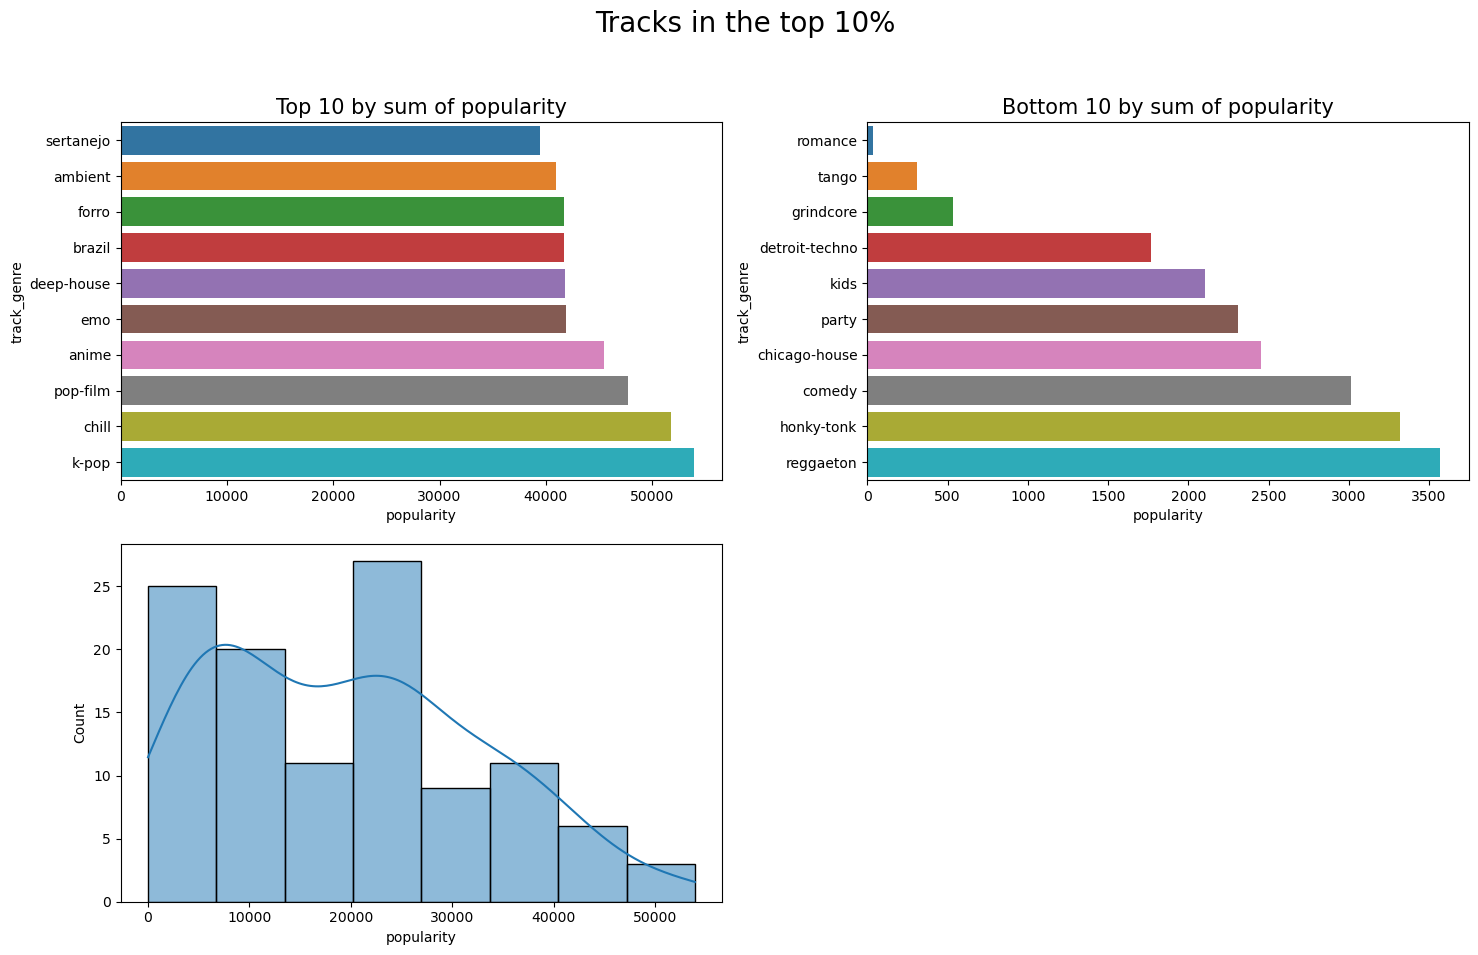

In [38]:
pop_df = pop50[['popularity', 'track_genre']]
pop_sum = pop_df.groupby('track_genre').sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
sns.histplot(data=pop_sum, x='popularity', kde=True, ax=axes[2])

top10 = pop_sum.sort_values('popularity').tail(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[0])
sb.set_title('Top 10 by sum of popularity', fontsize=15)

top10 = pop_sum.sort_values('popularity').head(10)
sb = sns.barplot(data=top10, y='track_genre', x='popularity', ax=axes[1])
sb.set_title('Bottom 10 by sum of popularity', fontsize=15)

fig.suptitle('Tracks in the top 10%', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes[-1].axis('off')